In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from typing import List

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [11]:
df = pd.read_csv("/home/jovyan/data/MTC_data/interactions.csv")
df.head()

user_id  item_id last_watch_dt  total_dur  watched_pct
0   176549     9506    2021-05-11       4250         72.0
1   699317     1659    2021-05-29       8317        100.0
2   656683     7107    2021-05-09         10          0.0
3   864613     7638    2021-07-05      14483        100.0
4   964868     9506    2021-04-30       6725        100.0

In [12]:
df.user_id.nunique(), df.item_id.nunique()

(962179, 15706)

In [14]:
df.last_watch_dt.min(), df.last_watch_dt.max()

('2021-03-13', '2021-08-22')

In [16]:
df["last_watch_dt"] = pd.to_datetime(df["last_watch_dt"]) - pd.to_datetime(df["last_watch_dt"]).min()
df["last_watch_dt"] = df.last_watch_dt.apply(lambda x: int(str(x).split()[0]))
df.sample(5)

user_id  item_id  last_watch_dt  total_dur  watched_pct
330370    935788     9982            133       2748         20.0
2125031   463159     6626            148       4925         94.0
53085     831957     4457            139       5587         85.0
2958703   414758     5906             59       2017         31.0
101154    325717    15297            126      16127         50.0

# Popular bias


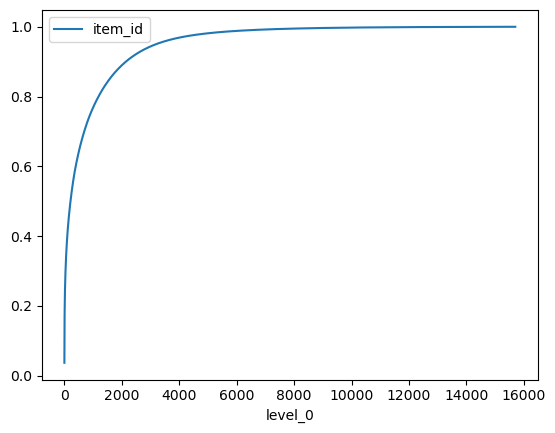

In [28]:
g = df.item_id.value_counts(True).cumsum().reset_index().reset_index()
g.plot(x="level_0", y="item_id")
plt.show()


## Популярность айтема по времени


/tmp/ipykernel_254/2911047944.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popular_items = df.item_id.value_counts()[:300].index.tolist()


<AxesSubplot: >

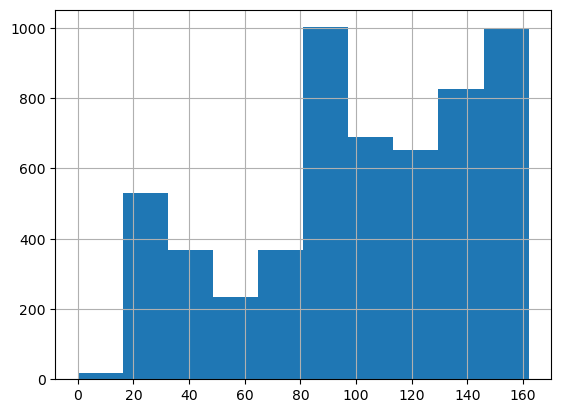

In [36]:
popular_items = df.item_id.value_counts()[:300].index.tolist()
sampled_id = np.random.choice(popular_items)
interactions = df.loc[df.item_id == sampled_id].copy()
interactions.last_watch_dt.hist()

In [37]:
interactions

user_id  item_id  last_watch_dt  total_dur  watched_pct
1388      438506    13243            148         37          1.0
4487      592342    13243            101       5269         97.0
4885      379874    13243            161       4819         88.0
5528      478132    13243             38      54155        100.0
5765      352112    13243             90       6124        100.0
...          ...      ...            ...        ...          ...
5471082      993    13243            151       6038        100.0
5471546   351191    13243            155        834         15.0
5471547   364376    13243             87       5086         93.0
5472970   230906    13243            108      23050        100.0
5475667   299586    13243            122       1281         23.0

[5685 rows x 5 columns]